In [12]:
import matplotlib.pyplot as plt
import ipyrad.analysis as ipa
import pandas as pd

In [2]:
data = "/home/ocoker/hoploreference_outfiles/hoploreference.snps.hdf5"
pca = ipa.pca(data)
pca.run()
pca.draw()


Samples: 94
Sites before filtering: 280267
Filtered (indels): 0
Filtered (bi-allel): 5412
Filtered (mincov): 33436
Filtered (minmap): 0
Filtered (subsample invariant): 0
Filtered (minor allele frequency): 0
Filtered (combined): 38415
Sites after filtering: 242095
Sites containing missing values: 242064 (99.99%)
Missing values in SNP matrix: 9615592 (42.25%)
SNPs (total): 242095
SNPs (unlinked): 51011
Imputation (null; sets to 0): 100.0%, 0.0%, 0.0%
Subsampling SNPs: 51011/242095


(<toyplot.canvas.Canvas at 0x7f34e1b58800>,
 <toyplot.coordinates.Cartesian at 0x7f34e2f34110>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="300.0px" viewBox="0 0 400.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5ff74229e0e8486ea0b9776e603226e0"> reference HOOC0001 HOOC0002 HOOC0003 HOOC0004 HOOC0005 HOOC0006 HOOC0007 HOOC0008 HOOC0009 HOOC0010 HOOC0011 HOOC0012 HOOC0013 HOOC0014 HOOC0015 HOOC0016 HOOC0017 HOOC0018 HOOC0019 HOOC0020 HOOC0021 HOOC0022 HOOC0023 HOOC0025 HOOC0026 HOOC0027 HOOC0028 HOOC0029 HOOC0030 HOOC0031 HOOC0032 HOOC0033 HOOC0034 HOOC0035 HOOC0036 HOOC0037 HOOC0038 HOOC0040 HOOC0041 HOOC0042 HOOC0043 HOOC0044 HOOC0045 HOOC0046 HOOC0048 HOOC0049 HOOC0050 HOOC0051 HOOC0052 HOOC0053 HOOC0054 HOOC0055 HOOC0056 HOOC0057 HOOC0058 HOOC0059 HOOC0060 HOOC0061 HOOC0062 HOOC0063 HOOC0064 HOOC0065 HOOC0066 HOOC0067 HOOC0068 HOOC0069 HOOC0070 HOOC0071 HOOC0072 HOOC0073 HOOC0074 HOOC0075 HOOC0076 HOOC0077 HOOC0078 HOOC0079 HOOC0080 HOOC0081 HOOC0082 HOOC0083 HOOC0084 HOOC0085 HOOC0086 HOOC0087 HOOC0088 HOOC0089 HOOC0090 HOOC0091 HOOC0092 HOOC0093 HOOC0094 HOOC0095 HOOC0096 -50 0 50 100 150 PC0 (13.8%) explained -50 0 50 PC1 (2.2%) explained

In [79]:
metadata = pd.read_csv("Hoplo_meta_data_2.csv")[["Seq ID", "Vegetation zone"]]
metadata
samples_per_zone = {k:list(v["Seq ID"]) for k,v in metadata.groupby("Vegetation zone")}
samples_per_zone.keys()

dict_keys(['Derived savanna', 'Giunea savanna', 'Mangrove Forest', 'Rainforest'])

In [63]:
colormap = {"Derived savanna":"red",
           "Giunea savanna":"blue",
            "Mangrove Forest":"green",
           "Rainforest":"black"}

colorlist = []
for sample in pcs.index:
    for species, samples in samples_per_zone.items():
        if sample in samples:
            colorlist.append(colormap[species])
colorlist

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

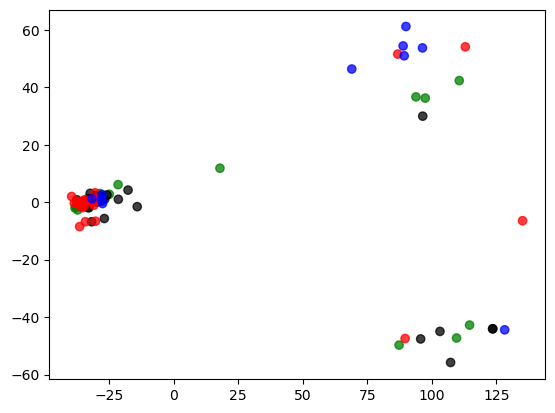

In [64]:
pcs = pca.pcs()
plt.scatter(pcs[0][1:], pcs[1][1:], c=colorlist, alpha=0.75)

In [54]:
loc_metadata = pd.read_csv("Hoplo_meta_data.csv")[["Seq ID", "Location"]]
loc_metadata
samples_per_loc = {k:list(v["Seq ID"]) for k,v in loc_metadata.groupby("Location")}
samples_per_loc.keys()


dict_keys(['Abeokuta', 'Ado', 'Badagry', 'Epe', 'Ibadan', 'Ifetedo', 'Igbeti', 'Ikorodu', 'Iwo', 'Soku'])

In [77]:
colormap = {'Abeokuta':'black',
            'Ado':'red', 
            'Badagry':'green', 
            'Epe':'lime', 
            'Ibadan':'dimgrey', 
            'Ifetedo':'darkgray', 
            'Igbeti':'blue', 
            'Ikorodu':'seagreen', 
            'Iwo':'lightcoral', 
            'Soku':'brown'}

colorlist = []
for sample in pcs.index:
    for species, samples in samples_per_loc.items():
        if sample in samples:
            colorlist.append(colormap[species])


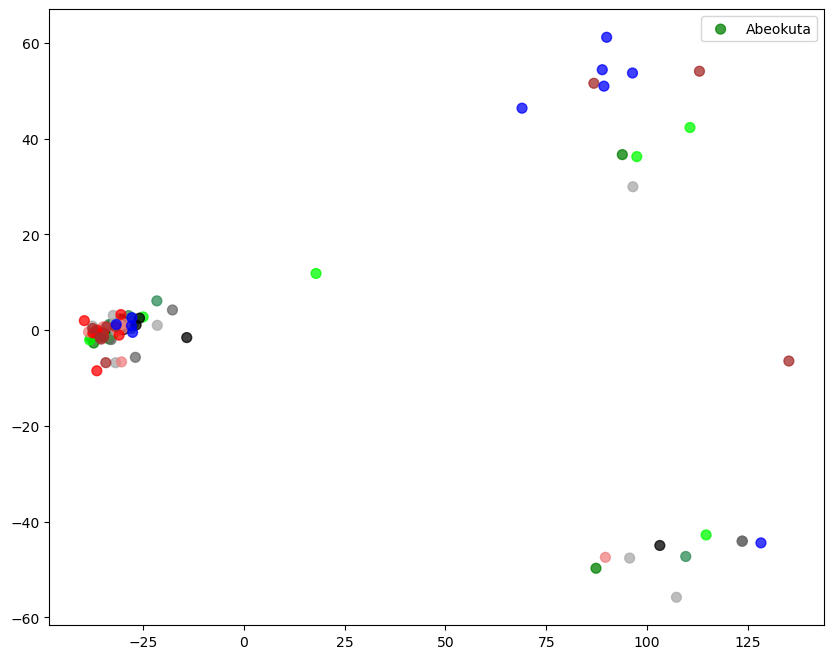

In [78]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(pcs[0][1:], pcs[1][1:], c=colorlist, alpha=0.75, s=50)
plt.legend(colormap)

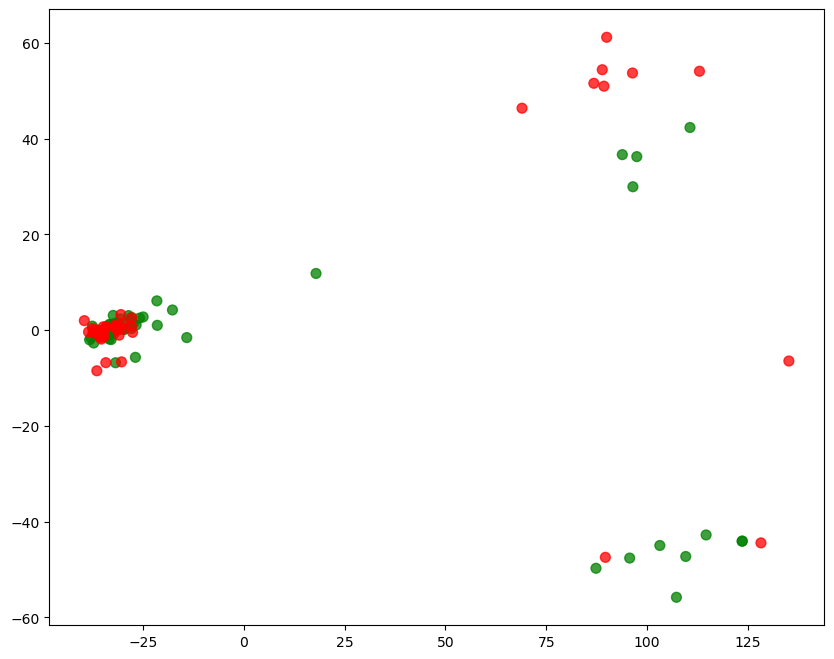

In [75]:
colormap = {"Derived savanna":"red",
           "Giunea savanna":"red",
            "Mangrove Forest":"green",
           "Rainforest":"green"}

colorlist = []
for sample in pcs.index:
    for species, samples in samples_per_zone.items():
        if sample in samples:
            colorlist.append(colormap[species])
            
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(pcs[0][1:], pcs[1][1:], c=colorlist, alpha=0.75, s=50)

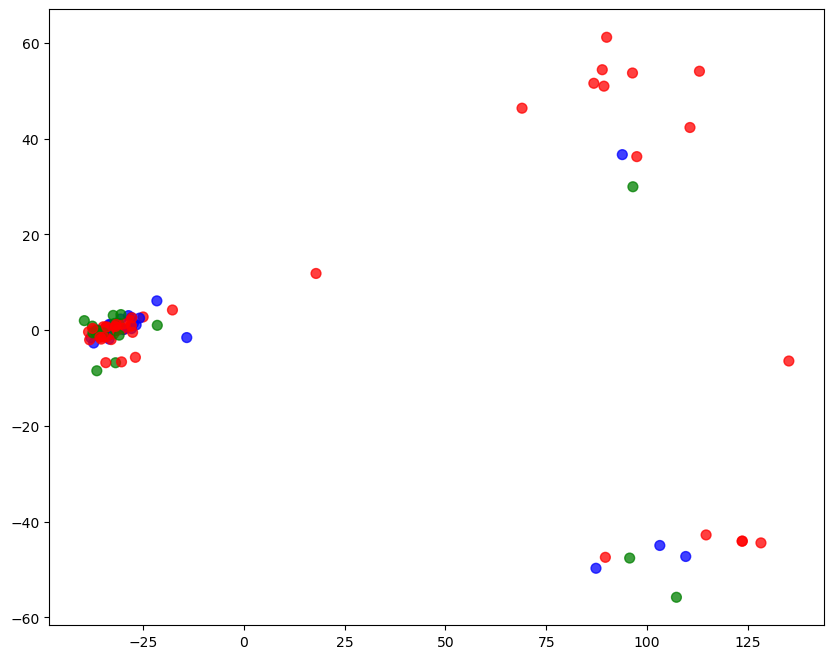

In [81]:
loc_metadata = pd.read_csv("Hoplo_meta_data_2.csv")[["Seq ID", "longitude"]]
loc_metadata
samples_per_long = {k:list(v["Seq ID"]) for k,v in loc_metadata.groupby("longitude")}
samples_per_long.keys()

colormap = {"BAIK":"blue",
           "EIBSI":"red",
            "ADIF":"green"}

colorlist = []
for sample in pcs.index:
    for species, samples in samples_per_long.items():
        if sample in samples:
            colorlist.append(colormap[species])
            
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(pcs[0][1:], pcs[1][1:], c=colorlist, alpha=0.75, s=50)